# Python Programming For Finance Intro (1)

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [2]:
style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,8,31)

df = web.DataReader('TSLA','yahoo',start,end)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-26,213.600006,215.020004,211.539993,215.000000,215.000000,5051900
2019-08-27,215.740005,218.800003,212.029999,214.080002,214.080002,5416200
2019-08-28,213.690002,217.250000,212.309998,215.589996,215.589996,3225500
2019-08-29,219.000000,223.399994,218.000000,221.710007,221.710007,5179500
2019-08-30,229.149994,232.440002,224.210007,225.610001,225.610001,9320600


* Note that Adjust close means adjusted for stock splits.

In [3]:
# Save it to a csv file
df.to_csv('TSLA.csv')

When we are using csv file, it doesn't provide index. So we started from csv file for practice.

In [4]:
# Use datetime as index
df = pd.read_csv('TSLA.csv',parse_dates=True,index_col=0)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Try to plot

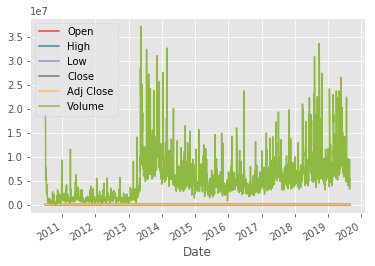

In [6]:
df.plot()

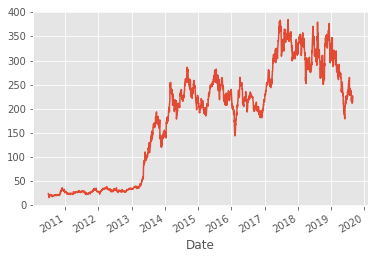

In [7]:
# reference to only adjusted close
df['Adj Close'].plot()

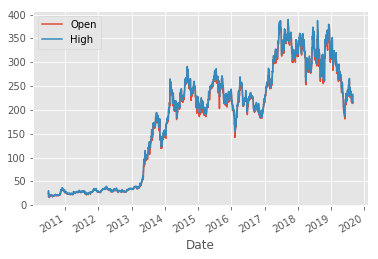

In [8]:
df[['Open','High']].plot()

## Basic stock data manipulation

In [9]:
# Create 100 day moving average
df['100ma'] = df['Adj Close'].rolling(window = 100).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2019-08-26,213.600006,215.020004,211.539993,215.000000,215.000000,5051900,232.4865
2019-08-27,215.740005,218.800003,212.029999,214.080002,214.080002,5416200,231.9495
2019-08-28,213.690002,217.250000,212.309998,215.589996,215.589996,3225500,231.3558
2019-08-29,219.000000,223.399994,218.000000,221.710007,221.710007,5179500,230.8409
2019-08-30,229.149994,232.440002,224.210007,225.610001,225.610001,9320600,230.3739


In [10]:
# Drop the first 100 days
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-11-17,30.200001,30.750000,28.610001,29.490000,29.490000,750000,20.9879
2010-11-18,30.670000,30.740000,28.920000,29.889999,29.889999,956100,21.0479
2010-11-19,30.160000,31.370001,29.700001,30.990000,30.990000,1150500,21.1195
2010-11-22,31.570000,33.450001,31.500000,33.400002,33.400002,1529700,21.2339
2010-11-23,33.290001,35.680000,32.189999,34.570000,34.570000,1577800,21.3876


### Ploting using just matplotlib instead of pandas

<BarContainer object of 2211 artists>

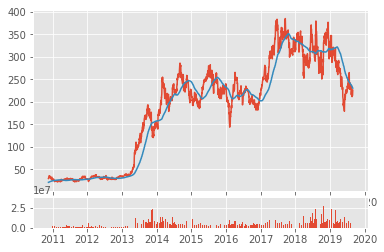

In [11]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.plot(df.index,df[['Adj Close','100ma']])
ax2.bar(df.index,df['Volume'])

## Resampling


In [12]:
#Open High Low Close
df_ohlc = df['Adj Close'].resample('2D').ohlc()
df_volume = df['Volume'].resample('2D').sum()

In [13]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-11-17,29.490000,29.889999,29.490000,29.889999
2010-11-19,30.990000,30.990000,30.990000,30.990000
2010-11-21,33.400002,33.400002,33.400002,33.400002
2010-11-23,34.570000,35.470001,34.570000,35.470001
2010-11-25,35.320000,35.320000,35.320000,35.320000


In [14]:
df_volume.head()

Date
2010-11-17    1706100
2010-11-19    1150500
2010-11-21    1529700
2010-11-23    3002800
2010-11-25     350600
Freq: 2D, Name: Volume, dtype: int64

In [15]:
from plotly import __version__

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode (connected=True)

cf.go_offline()

#### Plot with Ploty

In [16]:
df_ohlc[['open', 'high', 'low', 'close']]['2000-01-01':'2019-08-31'].iplot(kind="candle")

#### Plot with matplotlib (mpl-finance)

In [17]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdate
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,Date,open,high,low,close
0,2010-11-17,29.490000,29.889999,29.490000,29.889999
1,2010-11-19,30.990000,30.990000,30.990000,30.990000
2,2010-11-21,33.400002,33.400002,33.400002,33.400002
3,2010-11-23,34.570000,35.470001,34.570000,35.470001
4,2010-11-25,35.320000,35.320000,35.320000,35.320000


In [18]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdate.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,734093.0,29.490000,29.889999,29.490000,29.889999
1,734095.0,30.990000,30.990000,30.990000,30.990000
2,734097.0,33.400002,33.400002,33.400002,33.400002
3,734099.0,34.570000,35.470001,34.570000,35.470001
4,734101.0,35.320000,35.320000,35.320000,35.320000


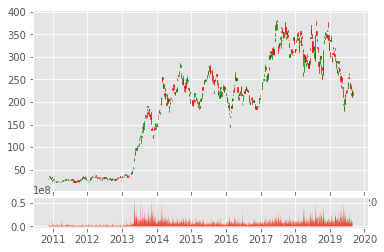

In [19]:
# plt.figure()
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup = 'g')
ax2.fill_between(df_volume.index.map(mdate.date2num),df_volume.values,0)